# Analysis notebook: `alpha_CRY_offspill-LH_as`  

## Define analysis name

In [1]:
ana_label = "alpha_CRY_offspill-LH_as"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/alpha_CRY_offspill-LH_as

alpha_CRY_offspill-LH_as.log   cut_flow.csv    hists.h5     stats.csv
alpha_CRY_offspill-LH_as.yaml  efficiency.csv  info.txt
analysis.csv		       events.parquet  results.pkl


In [4]:
!cat ../../../output/results/alpha_CRY_offspill-LH_as/analysis.csv

Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate [$\text{day}^{-1}$],Rate Err$-$ [$\text{day}^{-1}$],Rate Err$+$ [$\text{day}^{-1}$]
CE-like (wide),19428,4000000,0.4857,-0.003463779376989152,0.0034885365207998516,106.47475348732773,-0.7596731921908599,0.7651328406872011
CE-like (ext),2578,4000000,0.06445,-0.0012565184773963138,0.0012814862461543795,14.128675853939205,-0.27672598149345795,0.28221977590694713
CE-like (sig),292,4000000,0.0073,-0.00041486915979434936,0.00043986550354526446,1.600299980353083,-0.09309824138796641,0.09869804581629293
No veto (wide),7,19428,99.96396952851553,-0.016427781716876755,0.011284545366219145,0.03836335569339582,-0.014088643886960149,0.02055815547819132
No veto (ext),1,2578,99.96121024049651,-0.06271704554543511,0.023972407902550508,0.005480479384770832,-0.00452493924085891,0.012542209186345778
No veto (sig),0,292,100.0,-0.34129692832765013,0.0,0.0,0.0,0.006244646099314965


In [5]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/alpha_CRY_offspill-LH_as


In [6]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/alpha_CRY_offspill-LH_as/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/alpha_CRY_offspill-LH_as/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/alpha_CRY_offspill-LH_as/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/alpha_CRY_offspill-LH_as/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/alpha_CRY_offspill-LH_as/events.parquet
[Load] ✅ Loaded info from ../../../output/results/alpha_CRY_offspill-LH_as/info.txt


## Analyse results

### Cut flow

In [7]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,5754129,100.000,100.000,No selection applied
1,has_trk_front,Preselection,5732419,99.623,99.623,Tracks intersect tracker entrance
2,is_reco_electron,Preselection,5246599,91.180,91.525,Electron track fits
3,is_downstream,Preselection,3256493,56.594,62.069,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselection,2109815,36.666,64.788,One reco electron / event
5,is_truth_electron,Preselection,845921,14.701,40.095,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,366750,6.374,43.355,Track fit quality > 0.8
7,has_hits,Tracker,365722,6.356,99.720,>20 active tracker hits
8,within_d0,Tracker,52603,0.914,14.383,Distance of closest approach (d_0 < 100 mm)
9,within_pitch_angle_lo,Tracker,44228,0.769,84.079,Extrapolated pitch angle (pz/pt > 0.557735


### Efficiency & rates

In [8]:
display(results["analysis"].round(3))

,Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate [$\text{day}^{-1}$],Rate Err$-$ [$\text{day}^{-1}$],Rate Err$+$ [$\text{day}^{-1}$]
0,CE-like (wide),19428,4000000,0.486,-0.003,0.003,106.475,-0.760,0.765
1,CE-like (ext),2578,4000000,0.064,-0.001,0.001,14.129,-0.277,0.282
2,CE-like (sig),292,4000000,0.007,-0.000,0.000,1.600,-0.093,0.099
3,No veto (wide),7,19428,99.964,-0.016,0.011,0.038,-0.014,0.021
4,No veto (ext),1,2578,99.961,-0.063,0.024,0.005,-0.005,0.013
5,No veto (sig),0,292,100.000,-0.341,0.000,0.000,0.000,0.006


### Histograms

In [9]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/alpha_CRY_offspill-LH_as/h1o_1x3_mom_windows.png


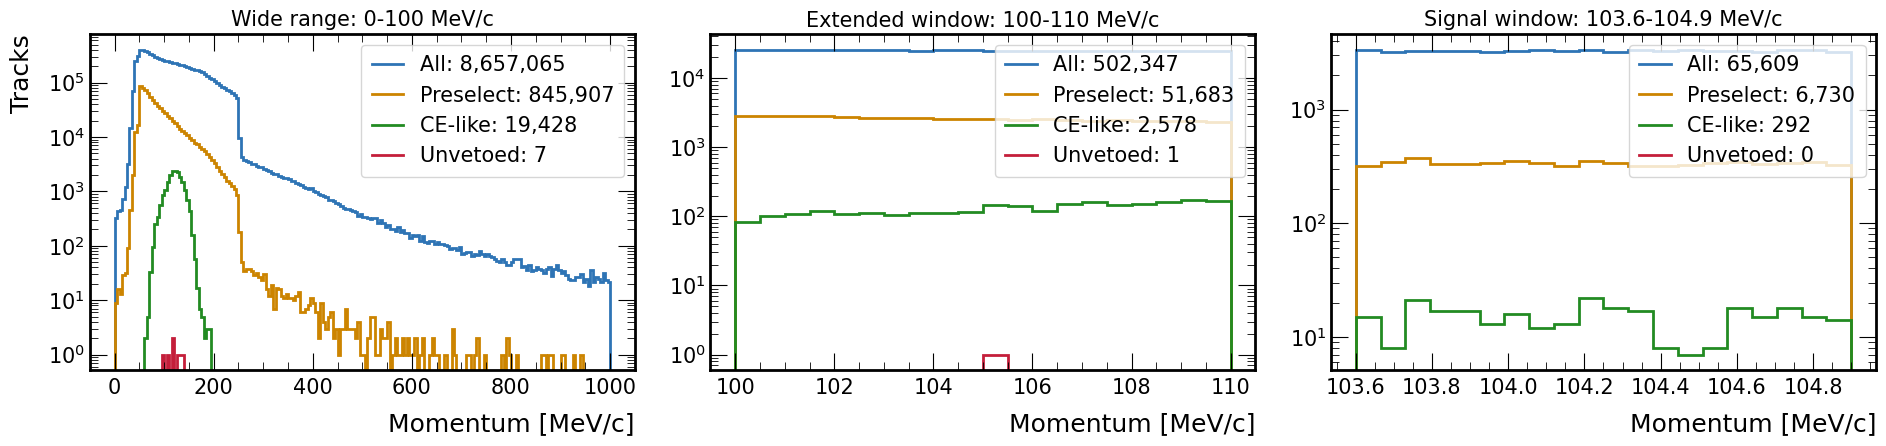

In [10]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/alpha_CRY_offspill-LH_as/h1o_3x3_summary.png


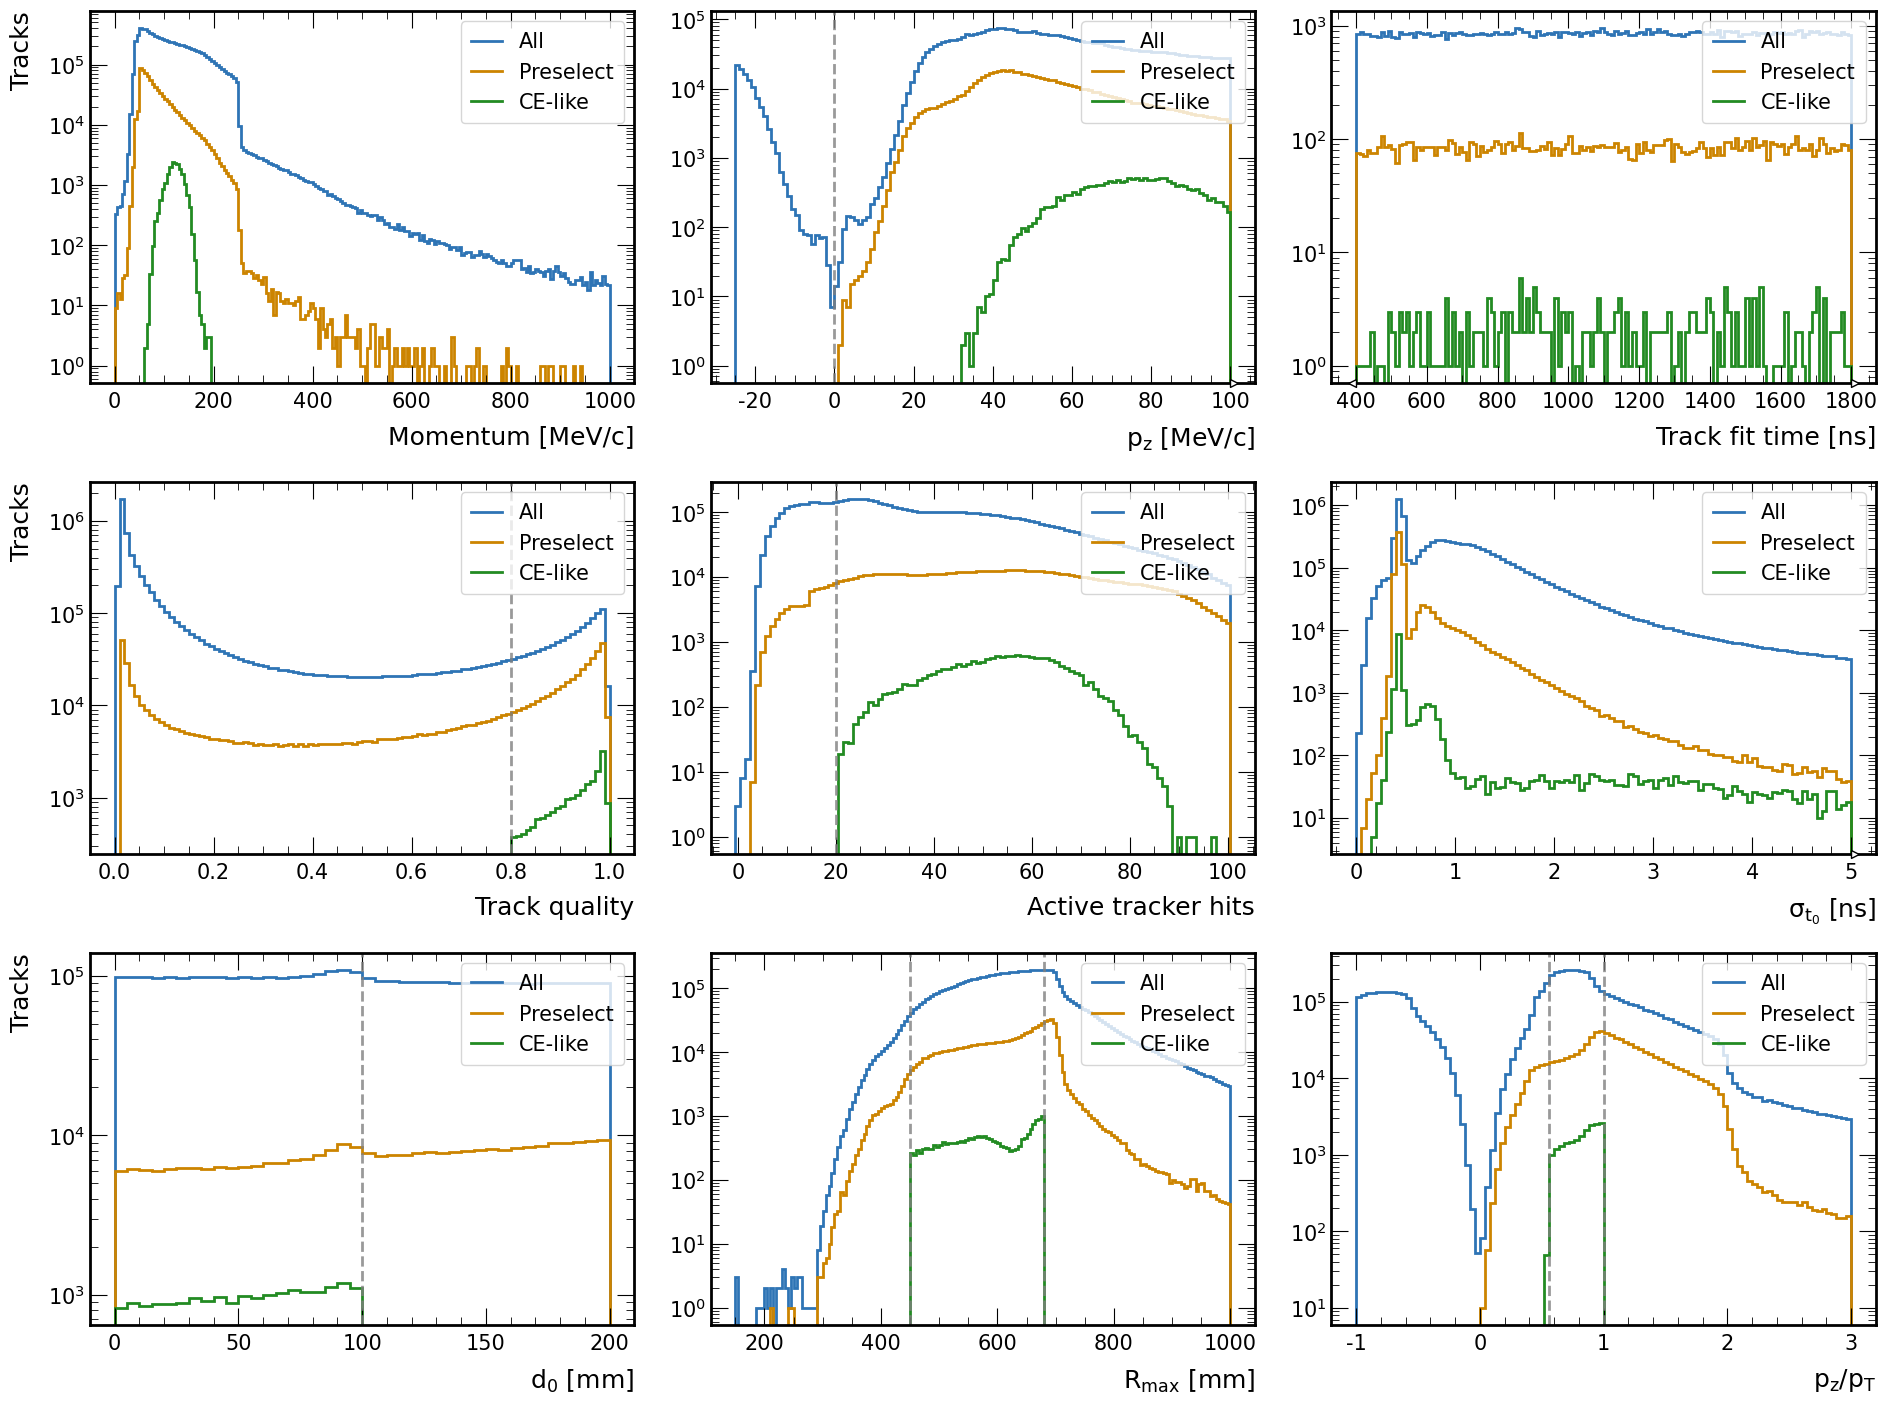

In [11]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/alpha_CRY_offspill-LH_as/h1o_crv_z.png


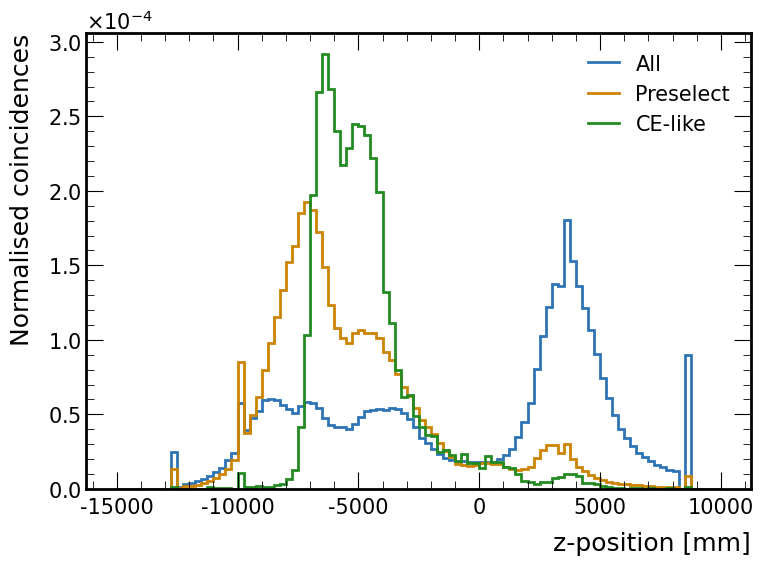

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [13]:
print(results["event_info"])

  Index:            29
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  59076.573926
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            195
  Subrun:           [18802]
  Event:            [50292]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015287.root
  Track time [ns]:  86861.975560
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            210
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015581.root
  Track time [ns]:  31331.604162
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            251
  Subrun: 

In [14]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 7 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
at_trk_front: [[False, False, False, False, False, False, True, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
is_downstream: [True, False, True, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, True, False]
has_hits: [True, True, True, True]
within_t0err: [True, False, True, False]
within_d0: [True, True, True, True]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, True, True]
within_lhr_max_lo: [True, False, True, False]
within_lhr_max_hi: [True, True, Tru